In [ ]:
# 1. Выбрать задачу (классификация или регрессия), датасет (пересечений не должно быть - у каждого студента свой датасет) и метрику качества

In [ ]:
# 2. Сделать препроцессинг, фичеинжинириг и т.д. \\ разрешается использование любых пакетов

In [ ]:
# 2*. Посчитать различные статистики, визуализировать данные и сделать первичные выводы \\ разрешается использование любых пакетов

In [94]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)


Mounted at /content/gdrive/


In [124]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn


In [125]:
data = pd.read_csv("/content/gdrive/MyDrive/caffeine.csv")
data

,drink,Volume (ml),Calories,Caffeine (mg),type
0,Costa Coffee,256.993715,0,277,Coffee
1,Coffee Friend Brewed Coffee,250.191810,0,145,Coffee
2,Hell Energy Coffee,250.191810,150,100,Coffee
3,Killer Coffee (AU),250.191810,0,430,Coffee
4,Nescafe Gold,250.191810,0,66,Coffee
...,...,...,...,...,...
605,Pep Talk Sparkling Water,354.882000,0,55,Water
606,Polar Seltzer Water,354.882000,0,0,Water
607,Yerbae Sparkling Water,354.882000,0,100,Water
608,Tonic Water,295.735000,110,0,Water


In [126]:
#Давайте  посчитаем количество элементов quality 
data['Caffeine (mg)'].value_counts()

80      37
100     34
160     33
0       28
120     23
        ..
187      1
188      1
189      1
192      1
1150     1
Name: Caffeine (mg), Length: 162, dtype: int64

Найдем медиану


In [127]:
data['Caffeine (mg)'].mean()

134.6934426229508

In [128]:
#Давайте классифицировать кофе на 2 класса, если количество кофеина =< 100 не крепкий (0), а если больше>100,  то крепкий (1)
data['Caffeine (mg)'] = data['Caffeine (mg)'].replace(to_replace =list(range(1, 101)), 
                            value =0)
data['Caffeine (mg)'] = data['Caffeine (mg)'].replace(to_replace =list(range(102, 1001)), 
                            value =1)
data.head()

,drink,Volume (ml),Calories,Caffeine (mg),type
0,Costa Coffee,256.993715,0,1,Coffee
1,Coffee Friend Brewed Coffee,250.191810,0,1,Coffee
2,Hell Energy Coffee,250.191810,150,0,Coffee
3,Killer Coffee (AU),250.191810,0,1,Coffee
4,Nescafe Gold,250.191810,0,0,Coffee


In [129]:
data['type'] = data['type'].replace(to_replace =['Coffee'], 
                            value =1)
data['type'] = data['type'].replace(to_replace =['Water'], 
                            value =5)
data['type'] = data['type'].replace(to_replace =['Energy Drinks'], 
                            value =0)
data['type'] = data['type'].replace(to_replace =['Energy Shots'], 
                            value =2)
data['type'] = data['type'].replace(to_replace =['Soft Drinks'], 
                            value =4)
data['type'] = data['type'].replace(to_replace =['Tea'], 
                            value =3)
data.head()

,drink,Volume (ml),Calories,Caffeine (mg),type
0,Costa Coffee,256.993715,0,1,1
1,Coffee Friend Brewed Coffee,250.191810,0,1,1
2,Hell Energy Coffee,250.191810,150,0,1
3,Killer Coffee (AU),250.191810,0,1,1
4,Nescafe Gold,250.191810,0,0,1


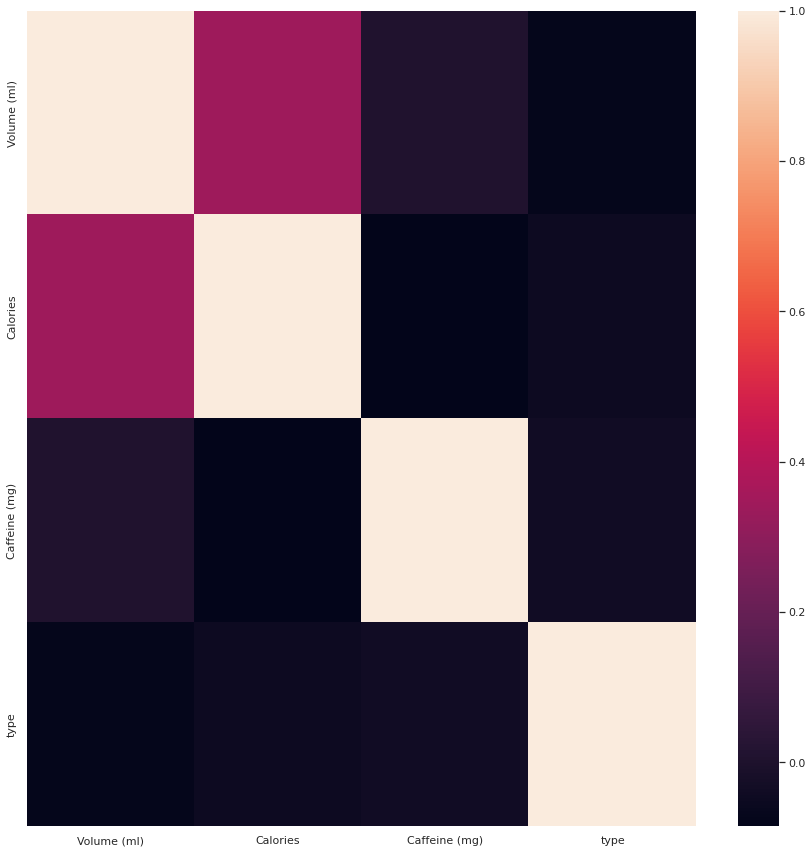

In [130]:
corr_matrix = data.corr()
sns.set(rc={'figure.figsize':(15,15)})
sns.heatmap(corr_matrix)

Как видно из матрицы корреляций,существует сильня зависимость между калориями и количеством коффеина, т. о. можно выбросить калории

In [131]:
data=data.drop(['drink'],axis=1)
data

,Volume (ml),Calories,Caffeine (mg),type
0,256.993715,0,1,1
1,250.191810,0,1,1
2,250.191810,150,0,1
3,250.191810,0,1,1
4,250.191810,0,0,1
...,...,...,...,...
605,354.882000,0,0,5
606,354.882000,0,0,5
607,354.882000,0,0,5
608,295.735000,110,0,5


In [132]:
data=data.drop(['Calories'],axis=1)
data

,Volume (ml),Caffeine (mg),type
0,256.993715,1,1
1,250.191810,1,1
2,250.191810,0,1
3,250.191810,1,1
4,250.191810,0,1
...,...,...,...
605,354.882000,0,5
606,354.882000,0,5
607,354.882000,0,5
608,295.735000,0,5


In [133]:
Y=data['Caffeine (mg)']
X=data.iloc[:,:1151]

In [135]:
from sklearn.preprocessing import StandardScaler
pca = StandardScaler()

pca.fit(X)
X = pca.transform(X)



In [ ]:
# 3. Реализовать метрику качества \\ аргументировать выбор метрики качества 

Для задачи классификации наиболее оптимальная метрика-это F1-Score как среднее грамоническое preccision и recall (выбор ошибки зависит от наших целей). 

In [136]:
def f1_score(y,y_predicted):
    tp = np.logical_and(y_predicted,y).sum()
    fp = np.logical_and(y_predicted, np.logical_not(y)).sum()
    fn =np.logical_and(np.logical_not(y_predicted),y).sum()
    tn=np.logical_and(np.logical_not(y),np.logical_not(y_predicted)).sum()
    precision=float(tp)/(tp+fp)
    recall=float(tp)/(tp+fn)
    return (2*((precision*recall)/(precision+recall)))

In [137]:
def accuracy( y, y_predicted):
        accuracy = np.mean(y== y_predicted)
        return accuracy * 100

In [ ]:
# 4. Реализовать и обучить логистическую регрессию или линейную регрессию \\ !!!не разрешается использовать sklearn!!!

In [ ]:
# 4*. Добавить регуляризацию \\ не разрешается использовать sklearn 
#Добавдена L2 регуляризация в коде

In [138]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.3, random_state=10)
X_train.shape

(427, 3)

In [139]:
class LogitRegression():
    def __init__(self, learning_rate =0.01, gradient_iterations=100):
        self.a = learning_rate
        self.iterations = gradient_iterations

    def _add_axis(self, X):
        return np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

    def _sigmoid(self, X):
        return 1.0 / (1.0 + np.exp(-X))

    def _probability(self, X):
        X = self._add_axis(X)
        return self._sigmoid(np.dot(X, self.w))

    def fit(self, X, y):
        X = self._add_axis(X)
        self.w = np.zeros(X.shape[1])
        accurancy=np.zeros(self.iterations)
        loss= np.zeros(self.iterations)
        for i in range(self.iterations):
            self.w -= (self.a * np.dot(X.T,(self._sigmoid(np.dot(X, self.w)) - y)) / len(y))
        return loss, accurancy   

    def predict(self, X, threshold=0.5):
        return self._probability(X) >= threshold



In [ ]:
# 6. Обучить логистическую регрессию или линейную регрессию из sklearn, оценить качество модели на обучающей и тестовой выборках и сравнить со своей моделью

In [ ]:
# 5. Оценить качество модели на обучающей и тестовой выборках \\ не разрешается использовать sklearn

In [140]:
lr=LogitRegression(learning_rate=0.1)
loss, accurancy_learn=lr.fit(X_train,y_train)
accuracy(y_test,lr.predict(X_test))
print("Train")
print(f"accurancy={accuracy(y_train,lr.predict(X_train))}")
print(f"f1_score={f1_score(y_train,lr.predict(X_train))*100}")
print("Test")
print(f"accurancy={accuracy(y_test,lr.predict(X_test))}")
print(f"f1_score={f1_score(y_test,lr.predict(X_test))*100}")


Train
accurancy=73.53629976580797
f1_score=76.65952890792292
Test
accurancy=71.03825136612022
f1_score=76.1904761904762


In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

In [142]:
lr_sk=LogisticRegression(penalty='none')
lr_sk.fit(X_train,y_train)
print('Train')
print(f"accurancy={accuracy(y_train,lr_sk.predict(X_train))}")
print(f"f1_score={f1_score(y_train,lr_sk.predict(X_train))*100}")
print('Test')
print(f"accurancy={accuracy(y_test,lr_sk.predict(X_test))}")
print(f"f1_score={f1_score(y_test,lr_sk.predict(X_test))*100}")


Train
accurancy=100.0
f1_score=100.0
Test
accurancy=98.36065573770492
f1_score=100.0
